In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Analysis of Starbucks Internationalization Strategy

In [2]:
sb_data = pd.read_csv('/Users/davidboutellier/Programming/PythonBootcamp/Final Project/directory.csv')

## Step 1: Trying to understand the dataset 

Looking at the columns and headers

In [3]:
sb_data.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


The size of the dataset:

In [4]:
sb_data.shape

(25600, 13)

And how complete it is:

In [5]:
sb_data.notnull().sum()

Brand             25600
Store Number      25600
Store Name        25600
Ownership Type    25600
Street Address    25598
City              25585
State/Province    25600
Country           25600
Postcode          24078
Phone Number      18739
Timezone          25600
Longitude         25599
Latitude          25599
dtype: int64

The dataset seems to be very complete, except for the phone number. Now to the task at hand: trying to identify the growth strategy of Starbucks.

## Step 2: Identifying a market to analyze

To understand Starbucks growth strategy, it's important to see in which countries they are present.

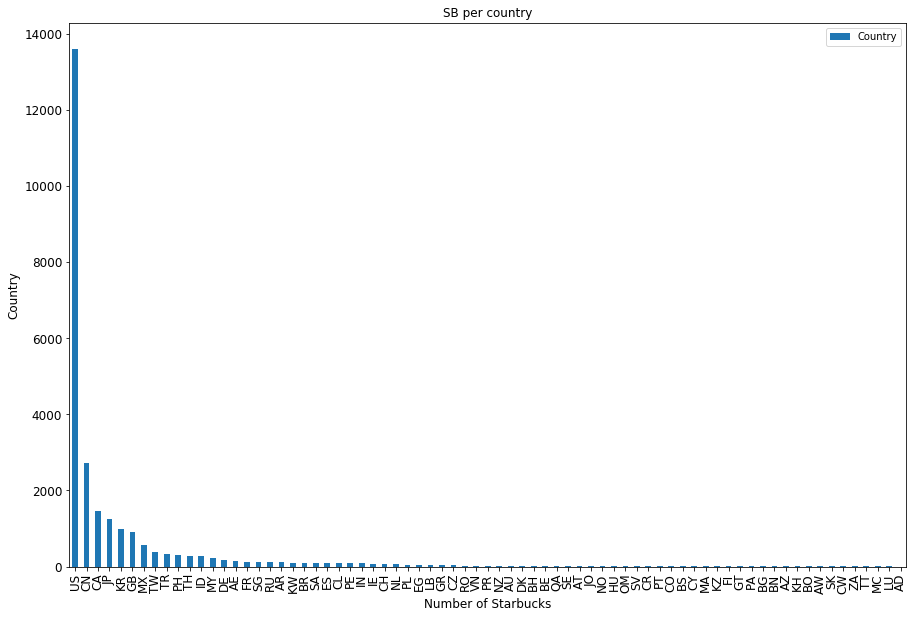

In [6]:
#Looking at the country distribution of Starbucks. 
country_bar = sb_data['Country'].value_counts().plot(kind='bar', title ="SB per country", figsize=(15, 10), legend=True, fontsize=12)
country_bar.set_xlabel("Number of Starbucks", fontsize=12)
country_bar.set_ylabel("Country", fontsize=12)

This did not help much, as the bar graph does not really give good insights. It would be better to see the spread of Starbucks on a map.

/Users/davidboutellier/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/davidboutellier/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/davidboutellier/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


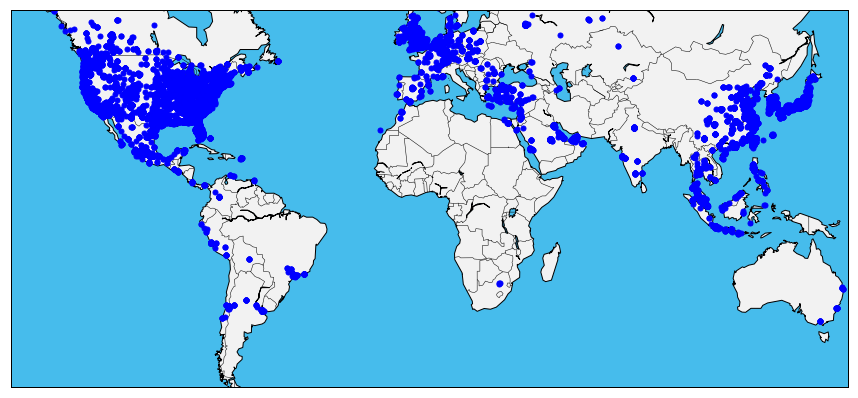

In [7]:
#create a map to get a better understanding of where Starbucks actually is

fig, ax = plt.subplots(figsize=(15,30))

m = Basemap(resolution='c', # c, l, i, h, f or None --> c = crude for coding, then switch to i or h
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-150.2, llcrnrlat= -54.3, urcrnrlon=155.2, urcrnrlat=58.6)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcountries()
m.drawcoastlines()

#Adding the locations of all the starbucks to the map

#First we need to combine long and lat to one field with a list of [long,lat]:

Longitude = list(sb_data["Longitude"])
Latitude = list(sb_data["Latitude"])

x,y = m(Longitude, Latitude)
m.plot(x, y, 'bo', markersize=5)

Starbucks is highly concentrated in the US, EU, and Asia. Let's take a closer look at Europe.

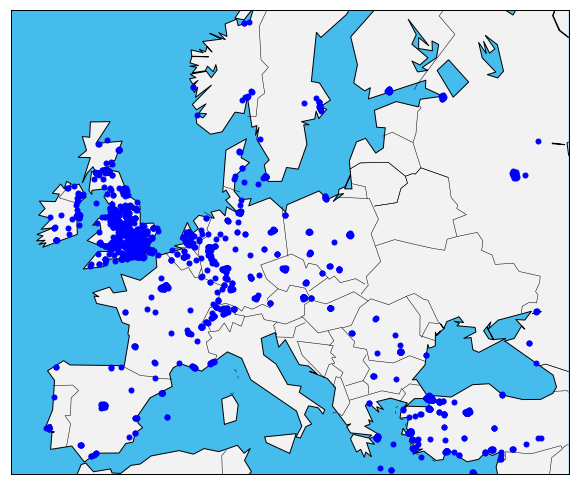

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(resolution='c', # c, l, i, h, f or None --> c = crude for coding, then switch to i or h
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-13, llcrnrlat= 35, urcrnrlon=43, urcrnrlat=64)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcountries()
m.drawcoastlines()

#Adding the locations of all the starbucks to the map

#First we need to combine long and lat to one field with a list of [long,lat]:

Longitude = list(sb_data["Longitude"])
Latitude = list(sb_data["Latitude"])

x,y = m(Longitude, Latitude)
m.plot(x, y, 'bo', markersize=5)

## Step 3: Identifying possible decision criteria for Starbucks

The highest concentration seems to be in the UK, Germany, Switzerlands, the Netherlands and Turkey. 

France, Spain, Portugal and Eastern Europe have fewer Cafes while Italy is a white spot on the map. 

For further analysis of Starbucks' growth, let's therefore focus on 12 countries: UK, Germany, Switzerland, Netherland, Turkey, France, Spain, Portugal, Italy, Belgium, Poland, Czech Republic

In order to reverse engineer Starbucks EU growth-strategy we are now looking at 3 Factors which might explain the decisions for the locations: 

    Coffee Consumption per Capita    
    GDP per capita

Let's look at the new countries which are in scope. We reduce the dataset for this.

In [9]:
scope = ['GB','DE','CH','NL','TR','FR','ES','PT','IT','BE','PL','CZ']

In [10]:
eu_data = sb_data[sb_data['Country'].isin(scope)]

In [11]:
eu_data.shape[0]

1851

In [12]:
eu_data.isnull().sum()

Brand               0
Store Number        0
Store Name          0
Ownership Type      0
Street Address      0
City                0
State/Province      0
Country             0
Postcode           31
Phone Number      593
Timezone            0
Longitude           0
Latitude            0
dtype: int64

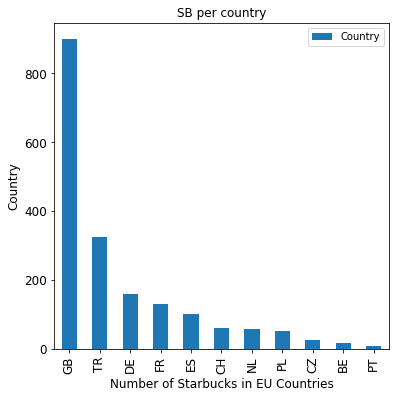

In [13]:
country_bar = eu_data['Country'].value_counts().plot(kind='bar', title ="SB per country", figsize=(6, 6), legend=True, fontsize=12)
country_bar.set_xlabel("Number of Starbucks in EU Countries", fontsize=12)
country_bar.set_ylabel("Country", fontsize=12)

## Step 4: Expanding the dataset for country specific indicators

There's 1851 stores in Europe and the UK is clearly dominating this with around half of them. Let's look at how this plays out when we look at the stores per capita and then compare it with the assumed variables behind the growth strategy. As this data is not included we need to gather it from another source. The Stores per Country get added from the existing Dataset. 

In [14]:
country_data = pd.read_csv('/Users/davidboutellier/Programming/PythonBootcamp/Final Project/CountriesStats.csv')

In [15]:
stores_per_country = eu_data['Country'].value_counts()
stores_per_country.set_value('IT',  0) ##add Italy, as it gets cut off by value_counts()

GB    901
TR    326
DE    160
FR    132
ES    101
CH     61
NL     59
PL     53
CZ     28
BE     19
PT     11
IT      0
Name: Country, dtype: int64

In [16]:
country_data = country_data.assign(Starbucks = stores_per_country.values)

In [17]:
from operator import truediv

stores_per_capita =  map(truediv, (country_data['Starbucks']), list(country_data['Population']))
stores_per_capita2 = [i * 1000000 for i in stores_per_capita] #to get the stores per million citizen
country_data = country_data.assign(Stores_per_Capita = stores_per_capita2)

In [18]:
country_data.head(12)

,Country,Population,GDP,Coffee Consumption,GDP per Capita,Starbucks,Stores_per_Capita
0,GB,65110276,2629188000000,0.389,40381,901,13.838061
1,TR,79817849,857429000000,0.342,10742,326,4.084299
2,DE,82900000,3466639000000,1.231,41817,160,1.930036
3,FR,66991000,2463222000000,0.694,36769,132,1.970414
4,ES,46423064,1232897000000,0.559,26558,101,2.175643
5,CH,8265000,659850000000,0.971,79837,61,7.380520
6,NL,17003777,771163000000,2.414,45352,59,3.469817
7,PL,38494000,267591000000,1.152,6951,53,1.376838
8,CZ,10535000,205270000000,1.170,19485,28,2.657807
9,BE,11259000,466960000000,0.981,41474,19,1.687539


## Step 5: Finding indication of how Starbucks pick countries to expand to

This shows us all the data we need, to try and analyze how Starbucks might pick the countries to expand too. On a first gaze it seems like that richer countries (UK, Switzerland) have many Starbucks per capita. It also seems like that countries with a low coffee consumption seem to have more Starbucks. Let's look at Correlations next.

In [19]:
country_data.corr(method="pearson", min_periods=1)

,Population,GDP,Coffee Consumption,GDP per Capita,Starbucks,Stores_per_Capita
Population,1.000000,0.783843,-0.332271,-0.239268,0.480829,0.101813
GDP,0.783843,1.000000,-0.123065,0.237200,0.477182,0.249451
Coffee Consumption,-0.332271,-0.123065,1.000000,0.284307,-0.282676,-0.089224
GDP per Capita,-0.239268,0.237200,0.284307,1.000000,0.037590,0.407509
Starbucks,0.480829,0.477182,-0.282676,0.037590,1.000000,0.865588
Stores_per_Capita,0.101813,0.249451,-0.089224,0.407509,0.865588,1.000000


The correlation analysis shows some interesing insights:
    - Starbucks is more present in richer countries (more stores per capita as the GDP per capita is higher)
    - There is (almost) no correlation between the amount of coffee people drink in a country and the number of        Starbucks locations.
    
There is generally not enough data (countries) to draw conclusions. For further analysis the expansion to Asia should be taken into account as well as other dimensions, such as consumer preferences and specific demographics. However it gives a first indication how Starbucks work and what they are considering when entering a new country. 

y=0.000079x+(0.849032)


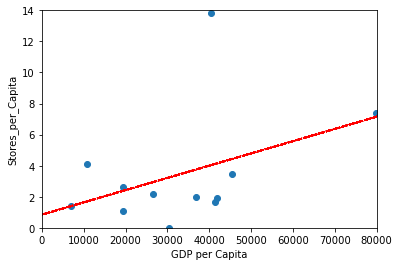

In [23]:
plt.plot(country_data['GDP per Capita'], country_data['Stores_per_Capita'],  "o")
plt.axis([0,80000,0,14])
plt.xlabel('GDP per Capita')
plt.ylabel('Stores_per_Capita')
z = numpy.polyfit(country_data['GDP per Capita'], country_data['Stores_per_Capita'], 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])


y=-0.546698x+(3.943302)


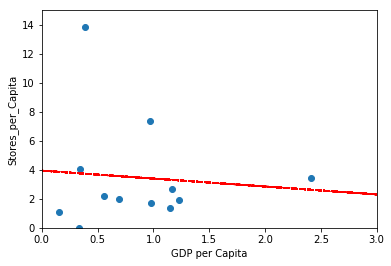

In [24]:
plt.plot(country_data['Coffee Consumption'], country_data['Stores_per_Capita'],  "o")
plt.axis([0,3,0,15])
plt.xlabel('GDP per Capita')
plt.ylabel('Stores_per_Capita')
z = numpy.polyfit(country_data['Coffee Consumption'], country_data['Stores_per_Capita'], 1)
p = numpy.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])